In [1]:
from statsmodels.iolib.smpickle import load_pickle
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
modelo_lana = load_pickle('modelo_prediccion_lana_3')

## Prueba con dataset MIrabueno

In [18]:
data = pd.read_csv("datos_producidos/datos_dptp_ha.csv")
data

,fecha,hectareas,departamento,carneros,ovejas,borregos,capones,cordero/as,total_ovinos,kilos_lana,finura,rinde,humedad,cant_lluvia,tem_max,temp_media,temp_min
0,2012-12-31,1294000,BIEDMA,5785,93378,30168,48447,16071,193849,649130.0,19.80,58.06,58.40,46.40,18.10,12.40,6.70
1,2013-12-31,1294000,BIEDMA,5376,82998,25341,47350,26832,187897,620176.0,19.60,56.68,64.70,226.50,19.90,14.20,8.80
2,2014-12-31,1294000,BIEDMA,4785,82706,29379,35155,29900,181925,649130.0,20.10,61.19,60.50,331.30,20.60,14.70,9.20
3,2015-12-31,1294000,BIEDMA,4440,89262,29663,35437,32343,191145,672480.0,18.58,58.18,58.70,114.20,22.20,15.80,10.20
4,2016-12-31,1294000,BIEDMA,4452,82295,33662,33470,21326,175205,653800.0,17.99,59.93,57.50,88.90,25.20,18.60,12.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,2016-12-31,1989300,TELSEN,4896,80262,26471,39243,20290,171162,637000.0,20.20,53.55,50.80,273.33,17.47,11.57,5.77
197,2017-12-31,1989300,TELSEN,4640,77556,27296,36570,17750,163812,637000.0,19.11,56.01,47.17,220.03,16.60,10.93,5.03
198,2018-12-31,1989300,TELSEN,4832,79117,28366,37558,21933,171806,637000.0,20.38,54.64,47.93,201.40,17.63,11.33,5.03
199,2019-12-31,1989300,TELSEN,4781,80109,28428,38109,17731,169158,613021.5,16.88,53.83,47.57,119.47,17.53,11.17,4.83


In [19]:
def transform_data(data_array):
    return [item for lista in data_array.tolist() for item in lista]

In [20]:
def scaler_data(attr):     
    standard_scaler = StandardScaler()
    x_values = data[attr]
    standard_scaler.fit(x_values)
    return standard_scaler.transform(x_values)

In [21]:
ha = transform_data(scaler_data(['hectareas']))
data.insert(2, "ha_s", ha, allow_duplicates=False)

ovinos = transform_data(scaler_data(['total_ovinos']))
data.insert(10, "ovinos_s", ovinos, allow_duplicates=False)

lana = transform_data(scaler_data(['kilos_lana']))
data.insert(12, "kg_lana_s", lana, allow_duplicates=False)

lluvia = transform_data(scaler_data(['cant_lluvia']))
data.insert(17, "lluvia_s", lluvia, allow_duplicates=False)

data

,fecha,hectareas,ha_s,departamento,carneros,ovejas,borregos,capones,cordero/as,total_ovinos,...,kilos_lana,kg_lana_s,finura,rinde,humedad,cant_lluvia,lluvia_s,tem_max,temp_media,temp_min
0,2012-12-31,1294000,0.143866,BIEDMA,5785,93378,30168,48447,16071,193849,...,649130.0,-0.301153,19.80,58.06,58.40,46.40,-0.953366,18.10,12.40,6.70
1,2013-12-31,1294000,0.143866,BIEDMA,5376,82998,25341,47350,26832,187897,...,620176.0,-0.336719,19.60,56.68,64.70,226.50,0.109007,19.90,14.20,8.80
2,2014-12-31,1294000,0.143866,BIEDMA,4785,82706,29379,35155,29900,181925,...,649130.0,-0.301153,20.10,61.19,60.50,331.30,0.727202,20.60,14.70,9.20
3,2015-12-31,1294000,0.143866,BIEDMA,4440,89262,29663,35437,32343,191145,...,672480.0,-0.272472,18.58,58.18,58.70,114.20,-0.553428,22.20,15.80,10.20
4,2016-12-31,1294000,0.143866,BIEDMA,4452,82295,33662,33470,21326,175205,...,653800.0,-0.295417,17.99,59.93,57.50,88.90,-0.702667,25.20,18.60,12.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,2016-12-31,1989300,1.066650,TELSEN,4896,80262,26471,39243,20290,171162,...,637000.0,-0.316053,20.20,53.55,50.80,273.33,0.385248,17.47,11.57,5.77
197,2017-12-31,1989300,1.066650,TELSEN,4640,77556,27296,36570,17750,163812,...,637000.0,-0.316053,19.11,56.01,47.17,220.03,0.070842,16.60,10.93,5.03
198,2018-12-31,1989300,1.066650,TELSEN,4832,79117,28366,37558,21933,171806,...,637000.0,-0.316053,20.38,54.64,47.93,201.40,-0.039052,17.63,11.33,5.03
199,2019-12-31,1989300,1.066650,TELSEN,4781,80109,28428,38109,17731,169158,...,613021.5,-0.345507,16.88,53.83,47.57,119.47,-0.522341,17.53,11.17,4.83


In [23]:
data_mirabueno = data[data.departamento=='MIRABUENO']
data_mirabueno

,fecha,hectareas,ha_s,departamento,carneros,ovejas,borregos,capones,cordero/as,total_ovinos,...,kilos_lana,kg_lana_s,finura,rinde,humedad,cant_lluvia,lluvia_s,tem_max,temp_media,temp_min
74,1985-12-31,250,-1.573166,MIRABUENO,50,1419,563,690,912,3634,...,15600.0,-1.079342,19.26,60.46,57.6,208.6,0.003419,20.9,14.3,6.4
75,1986-12-31,250,-1.573166,MIRABUENO,53,1520,605,1045,680,3903,...,18167.0,-1.076189,19.86,61.52,58.1,130.3,-0.458457,20.5,12.9,5.8
76,1987-12-31,250,-1.573166,MIRABUENO,67,1928,637,964,512,4108,...,11200.0,-1.084747,19.41,55.77,60.3,199.5,-0.050260,20.7,13.8,6.8
77,1988-12-31,250,-1.573166,MIRABUENO,55,1560,575,1210,310,3710,...,13197.0,-1.082294,18.65,61.69,54.9,85.5,-0.722723,20.4,12.9,5.5
78,1989-12-31,250,-1.573166,MIRABUENO,42,1210,457,1091,150,2950,...,12300.0,-1.083396,19.82,57.13,56.5,92.5,-0.681432,21.9,14.5,7.1
79,1990-12-31,250,-1.573166,MIRABUENO,35,998,390,969,124,2516,...,13900.0,-1.081430,20.23,59.84,56.2,96.0,-0.660786,21.7,14.2,6.8
80,1991-12-31,250,-1.573166,MIRABUENO,39,1122,407,995,60,2623,...,15800.0,-1.079097,20.47,60.56,60.3,240.0,0.188641,20.6,13.2,5.8
81,1992-12-31,250,-1.573166,MIRABUENO,39,1125,451,1225,70,2910,...,11600.0,-1.084256,19.80,54.04,62.2,335.2,0.750207,19.9,14.4,4.7
82,1993-12-31,250,-1.573166,MIRABUENO,43,1240,447,1090,65,2885,...,10306.0,-1.085845,19.30,58.81,58.1,155.7,-0.308628,21.0,14.8,5.5
83,1994-12-31,250,-1.573166,MIRABUENO,32,925,428,1342,34,2761,...,9000.0,-1.087449,18.87,61.83,53.7,82.5,-0.740420,24.3,13.5,4.6


In [24]:
data[data.departamento=='BIEDMA']

,fecha,hectareas,ha_s,departamento,carneros,ovejas,borregos,capones,cordero/as,total_ovinos,...,kilos_lana,kg_lana_s,finura,rinde,humedad,cant_lluvia,lluvia_s,tem_max,temp_media,temp_min
0,2012-12-31,1294000,0.143866,BIEDMA,5785,93378,30168,48447,16071,193849,...,649130.0,-0.301153,19.80,58.06,58.4,46.4,-0.953366,18.1,12.4,6.7
1,2013-12-31,1294000,0.143866,BIEDMA,5376,82998,25341,47350,26832,187897,...,620176.0,-0.336719,19.60,56.68,64.7,226.5,0.109007,19.9,14.2,8.8
2,2014-12-31,1294000,0.143866,BIEDMA,4785,82706,29379,35155,29900,181925,...,649130.0,-0.301153,20.10,61.19,60.5,331.3,0.727202,20.6,14.7,9.2
3,2015-12-31,1294000,0.143866,BIEDMA,4440,89262,29663,35437,32343,191145,...,672480.0,-0.272472,18.58,58.18,58.7,114.2,-0.553428,22.2,15.8,10.2
4,2016-12-31,1294000,0.143866,BIEDMA,4452,82295,33662,33470,21326,175205,...,653800.0,-0.295417,17.99,59.93,57.5,88.9,-0.702667,25.2,18.6,12.9
5,2017-12-31,1294000,0.143866,BIEDMA,4688,87179,33148,33947,20900,179862,...,653800.0,-0.295417,19.73,58.95,55.8,291.9,0.494789,19.1,13.6,8.4
6,2018-12-31,1294000,0.143866,BIEDMA,4767,86473,36233,31347,22289,181109,...,653800.0,-0.295417,18.86,58.89,56.3,99.0,-0.643089,21.0,14.8,9.5
7,2019-12-31,1294000,0.143866,BIEDMA,4887,84400,31784,34032,23424,178527,...,629189.1,-0.325648,18.95,57.81,54.1,295.5,0.516025,18.7,13.6,8.7
8,2020-12-31,1294000,0.143866,BIEDMA,3084,82806,29134,33727,25394,174145,...,630450.0,-0.324099,19.10,58.71,58.3,191.4,-0.098040,20.5,14.6,9.2


## Prueba con dataset Mirabueno escalados

In [51]:
X_prediccion = data_mirabueno[["lluvia_s", "ovinos_s","ha_s"]]
y_real = data_mirabueno[['kg_lana_s']]

In [52]:
y_real

,kg_lana_s
74,-1.079342
75,-1.076189
76,-1.084747
77,-1.082294
78,-1.083396
79,-1.081430
80,-1.079097
81,-1.084256
82,-1.085845
83,-1.087449


In [47]:
resultado_prediccion_mirabueno_scaler = modelo_lana.predict(X_prediccion)
y_prediccion = transform_data(resultado_prediccion_mirabueno_scaler)
y_prediccion

/home/lucila/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


[-1.1117552410792355,
 -1.0981199542762619,
 -1.1082470428503808,
 -1.0918255947045636,
 -1.0962419922151334,
 -1.0986847987542392,
 -1.1211469943912045,
 -1.1350574359511172,
 -1.1065868252660216,
 -1.0954709620546157,
 -1.1268591901964433,
 -1.0939204443276895,
 -1.1297387253459803,
 -1.1381447387819805,
 -1.1289227960626105,
 -1.113740383283784,
 -1.1090343919749197,
 -1.1133126932791422,
 -1.1027167900707233,
 -1.1009760779312467,
 -1.1015783422416392,
 -1.109944242951372,
 -1.1110931861665636,
 -1.1105035435840946,
 -1.1122481736264538,
 -1.1134560869115946,
 -1.1074463034447453,
 -1.1137424288251452,
 -1.1166858451852566,
 -1.111502195550722,
 -1.0939810549878726,
 -1.1098848128822065,
 -1.1169045127293906,
 -1.0957756129510325,
 -1.0989260279648707,
 -1.094033535936196]

In [53]:
y_real.insert(1, "y_prediccion", y_prediccion, allow_duplicates=False)
y_real

,kg_lana_s,y_prediccion
74,-1.079342,-1.111755
75,-1.076189,-1.098120
76,-1.084747,-1.108247
77,-1.082294,-1.091826
78,-1.083396,-1.096242
79,-1.081430,-1.098685
80,-1.079097,-1.121147
81,-1.084256,-1.135057
82,-1.085845,-1.106587
83,-1.087449,-1.095471


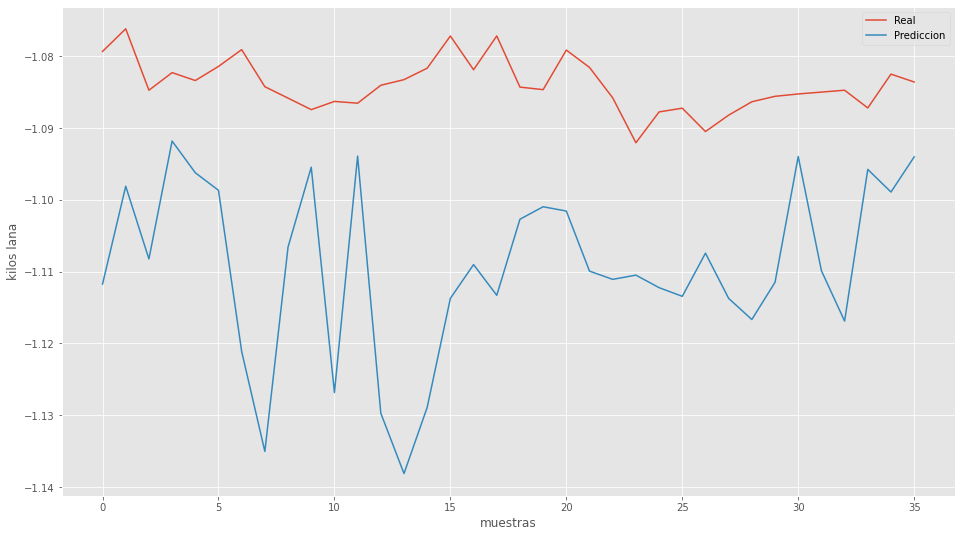

In [57]:
plt.plot(range(len(y_real)),y_real,label=["Real", "Prediccion"])
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
plt.xlabel('muestras')
plt.ylabel('kilos lana')
plt.legend()
plt.show()

In [30]:
print('Exactitud de la predicción:')
print(str(round(r2_score(y_prediccion, resultado_prediccion_mirabueno_scaler),4)))

Exactitud de la predicción:
-62.3169


In [31]:
print('MSE:')
print(str(round(mean_squared_error(y_prediccion, resultado_prediccion_mirabueno_scaler),4)))

MSE:
0.0008
